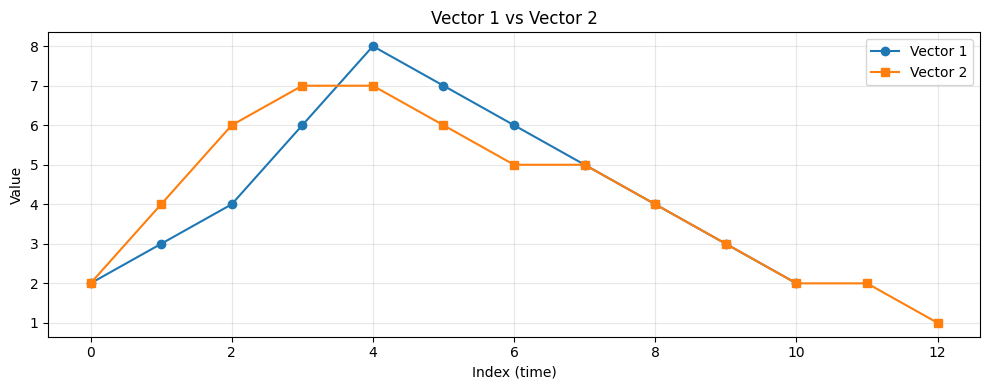

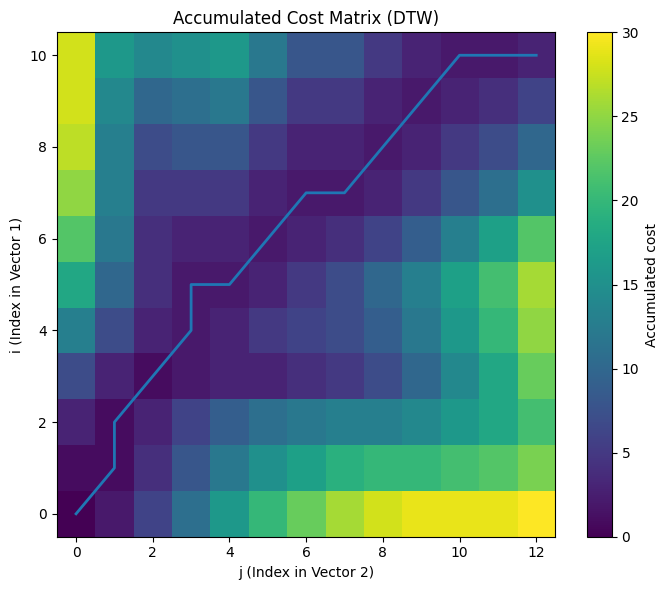

=== DTW Results ===
Length of Vector 1 (n): 11
Length of Vector 2 (m): 13
DTW distance (raw): 3.0000
Path length: 15
DTW distance normalized by path length: 0.200000

Inference:
Dynamic Time Warping (DTW) successfully aligns the two sequences even though they differ in length
and exhibit temporal distortions. Vector 2 is effectively a stretched (and slightly shifted) version of
Vector 1: similar shapes are matched by allowing non-linear time mapping (repetition and compression
of indices). The accumulated cost matrix visualizes the cumulative alignment cost, and the optimal
warping path bends away from the main diagonal wherever stretching/compression is needed to align
corresponding trends (rising to peak, plateau, and fall).

The DTW distance here is 3.0000 (normalized: 0.200000), which quantifies the
residual mismatch after optimal time warping. A smaller value indicates a closer match; in this case,
the relatively low distance (given the comparable value ranges of the vectors: Δx≈6

In [1]:
# -*- coding: utf-8 -*-
# Lab Exercise VI – Dynamic Time Warping (DTW)
# Colab-ready, no extra installs required.

import numpy as np
import matplotlib.pyplot as plt

# ---------------------------
# 1) Given data
# ---------------------------
x = np.array([2, 3, 4, 6, 8, 7, 6, 5, 4, 3, 2], dtype=float)  # Vector 1
y = np.array([2, 4, 6, 7, 7, 6, 5, 5, 4, 3, 2, 2, 1], dtype=float)  # Vector 2

# ---------------------------
# 2) Helper: DTW implementation from scratch
#    - Local cost: absolute difference
#    - Accumulated cost with dynamic programming
#    - Backtracking the optimal path
# ---------------------------
def dtw(a, b):
    """
    Compute DTW between sequences a (len n) and b (len m).
    Returns:
      Dacc: (n, m) accumulated cost matrix
      path: list of (i, j) indices from start to end (optimal warping path)
      dist: DTW distance = Dacc[-1, -1]
    """
    n, m = len(a), len(b)

    # Local cost matrix (|a_i - b_j|)
    D = np.abs(a[:, None] - b[None, :])

    # Accumulated cost matrix
    Dacc = np.full((n, m), np.inf)
    Dacc[0, 0] = D[0, 0]

    # Initialize first row and first column
    for i in range(1, n):
        Dacc[i, 0] = D[i, 0] + Dacc[i-1, 0]
    for j in range(1, m):
        Dacc[0, j] = D[0, j] + Dacc[0, j-1]

    # Dynamic programming fill
    for i in range(1, n):
        for j in range(1, m):
            Dacc[i, j] = D[i, j] + min(Dacc[i-1, j],    # insertion (move down)
                                       Dacc[i, j-1],    # deletion  (move right)
                                       Dacc[i-1, j-1])  # match     (move diag)

    # Backtrack optimal path from (n-1, m-1) to (0, 0)
    i, j = n-1, m-1
    path = [(i, j)]
    while i > 0 or j > 0:
        if i == 0:
            j -= 1
        elif j == 0:
            i -= 1
        else:
            # Choose predecessor with minimum accumulated cost
            choices = [Dacc[i-1, j], Dacc[i, j-1], Dacc[i-1, j-1]]
            argmin = int(np.argmin(choices))
            if argmin == 0:
                i -= 1
            elif argmin == 1:
                j -= 1
            else:
                i -= 1; j -= 1
        path.append((i, j))
    path.reverse()

    dist = float(Dacc[-1, -1])
    return Dacc, path, dist

# ---------------------------
# 3) Run DTW
# ---------------------------
Dacc, path, dtw_dist = dtw(x, y)
path_len = len(path)
dtw_dist_norm = dtw_dist / path_len  # optional normalized distance

# ---------------------------
# 4) Plots
# ---------------------------

# Plot A: the two vectors (time series)
plt.figure(figsize=(10, 4))
plt.plot(range(len(x)), x, marker='o', label='Vector 1')
plt.plot(range(len(y)), y, marker='s', label='Vector 2')
plt.title('Vector 1 vs Vector 2')
plt.xlabel('Index (time)')
plt.ylabel('Value')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Plot B: Accumulated cost matrix with optimal warping path
plt.figure(figsize=(7, 6))
plt.imshow(Dacc, origin='lower', aspect='auto')
plt.colorbar(label='Accumulated cost')
plt.title('Accumulated Cost Matrix (DTW)')

# Overlay optimal path
pi, pj = zip(*path)
plt.plot(pj, pi, linewidth=2)  # note x=j, y=i because of imshow orientation
plt.xlabel('j (Index in Vector 2)')
plt.ylabel('i (Index in Vector 1)')
plt.tight_layout()
plt.show()

# ---------------------------
# 5) Print numeric results
# ---------------------------
print("=== DTW Results ===")
print(f"Length of Vector 1 (n): {len(x)}")
print(f"Length of Vector 2 (m): {len(y)}")
print(f"DTW distance (raw): {dtw_dist:.4f}")
print(f"Path length: {path_len}")
print(f"DTW distance normalized by path length: {dtw_dist_norm:.6f}")

# ---------------------------
# 6) Auto-generated inference (you can paste this in your report)
# ---------------------------
# Simple qualitative checks to tailor the message:
x_range = (x.max() - x.min())
y_range = (y.max() - y.min())
shift_hint = "slightly shifted" if abs(np.argmax(x) - np.argmax(y)) > 0 else "aligned in peak location"

inference = f"""
Inference:
Dynamic Time Warping (DTW) successfully aligns the two sequences even though they differ in length
and exhibit temporal distortions. Vector 2 is effectively a stretched (and {shift_hint}) version of
Vector 1: similar shapes are matched by allowing non-linear time mapping (repetition and compression
of indices). The accumulated cost matrix visualizes the cumulative alignment cost, and the optimal
warping path bends away from the main diagonal wherever stretching/compression is needed to align
corresponding trends (rising to peak, plateau, and fall).

The DTW distance here is {dtw_dist:.4f} (normalized: {dtw_dist_norm:.6f}), which quantifies the
residual mismatch after optimal time warping. A smaller value indicates a closer match; in this case,
the relatively low distance (given the comparable value ranges of the vectors: Δx≈{x_range:.1f},
Δy≈{y_range:.1f}) confirms that the sequences are similar in shape, and the non-linear warping path
shows precisely how Vector 2 must be time-stretched/compressed to match Vector 1.
"""
print(inference)
